# Some cool python trick taken from Chip Huyen [https://github.com/chiphuyen/python-is-cool]. Machine learning examples form chris smith [https://crsmithdev.com/blog/ml-linear-regression/]

# 1. Lambda, map, filter, reduce

The lambda keyword is used to create inline functions. `square_fn` and `square_ld` below are identical:

In [2]:
x = 10

In [3]:
def square_fn(x):
    return x * x

square_ld = lambda x: x * x

for i in range(10):
    assert square_fn(i) == square_ld(i)

Its quick declaration makes `lambda` functions ideal for use in callbacks, and when functions are to be passed as arguments to other functions. They are especially useful when used in conjunction with functions like `map`, `filter`, and `reduce`.

`map(fn, iterable)` applies the `fn` to all elements of the `iterable` (e.g. list, set, dictionary, tuple, string) and returns a map object.

In [4]:
nums = [1/3, 333/7, 2323/2230, 40/34, 2/3]
nums_squared = [num * num for num in nums]
print(nums_squared)

[0.1111111111111111, 2263.0408163265306, 1.0851472983570953, 1.384083044982699, 0.4444444444444444]


This is the same as calling using `map` with a callback function.

In [3]:
nums_squared_1 = map(square_fn, nums)
nums_squared_2 = map(lambda x: x * x, nums)
print(list(nums_squared_1))

[0.1111111111111111, 2263.0408163265306, 1.0851472983570953, 1.384083044982699, 0.4444444444444444]


You can also use `map` with more than one iterable. For example, if you want to calculate the mean squared error of a simple linear function `f(x) = ax + b` with the true label `labels`, these two methods are equivalent:

In [4]:
a, b = 3, -0.5
xs = [2, 3, 4, 5]
labels = [6.4, 8.9, 10.9, 15.3]

# Method 1: using a loop
errors = []
for i, x in enumerate(xs):
    errors.append((a * x + b - labels[i]) ** 2)
result1 = sum(errors) ** 0.5 / len(xs)

# Method 2: using map
diffs = map(lambda x, y: (a * x + b - y) ** 2, xs, labels)
result2 = sum(diffs) ** 0.5 / len(xs)

print(result1, result2)

0.35089172119045514 0.35089172119045514


Note that objects returned by `map` and `filter` are iterators, which means that their values aren't stored but generated as needed. After you've called `sum(diffs)`, `diffs` becomes empty. If you want to keep all elements in `diffs`, convert it to a list using `list(diffs)`.

`filter(fn, iterable)` works the same way as `map`, except that `fn` returns a boolean value and `filter` returns all the elements of the `iterable` for which the `fn` returns True.

In [5]:
bad_preds = filter(lambda x: x > 0.5, errors)
print(list(bad_preds))

[0.8100000000000006, 0.6400000000000011]


`reduce(fn, iterable, initializer)` is used when we want to iteratively apply an operator to all elements in a list. For example, if we want to calculate the product of all elements in a list:

In [6]:
product = 1
for num in nums:
    product *= num
print(product)

12.95564683272412


This is equivalent to:

In [7]:
from functools import reduce
product = reduce(lambda x, y: x * y, nums)
print(product)

12.95564683272412


### Note on the performance of lambda functions

Lambda functions are meant for one time use. Each time `lambda x: dosomething(x)` is called, the function has to be created, which hurts the performance if you call `lambda x: dosomething(x)` multiple times (e.g. when you pass it inside `reduce`).

When you assign a name to the lambda function as in `fn = lambda x: dosomething(x)`, its performance is slightly slower than the same function defined using `def`, but the difference is negligible. See [here](https://stackoverflow.com/questions/26540885/lambda-is-slower-than-function-call-in-python-why).

Even though I find lambdas cool, I personally recommend using named functions when you can for the sake of clarity.

# 2. List manipulation
Python lists are super cool.

## 2.1 Unpacking
We can unpack a list by each element like this:

In [5]:
elems = [1, 2, 3, 4]
a, b, c, d = elems
print(a, b, c, d)

1 2 3 4


In [6]:
type(elems)

list

We can also unpack a list like this:

In [9]:
a, *new_elems, d = elems
print(a)
print(new_elems)
print(d)

1
[2, 3]
4


## 2.2 Slicing
We know that we can reverse a list using `[::-1]`.

In [10]:
elems = list(range(10))
print(elems)
print(elems[::-1])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


The syntax `[x:y:z]` means "take every `z`th element of a list from index `x` to index `y`". When `z` is negative, it indicates going backwards. When `x` isn't specified, it defaults to the first element of the list in the direction you are traversing the list. When `y` isn't specified, it defaults to the last element of the list. So if we want to take every 2th element of a list, we use `[::2]`.

In [11]:
evens = elems[::2]
print(evens)

reversed_evens = elems[-2::-2]
print(reversed_evens)

[0, 2, 4, 6, 8]
[8, 6, 4, 2, 0]


We can also use slicing to delete all the even numbers in the list.

In [12]:
del elems[::2]
print(elems)

[1, 3, 5, 7, 9]


## 2.3 Insertion
We can change the value of an element in a list to another value.

In [13]:
elems = list(range(10))
elems[1] = 10
print(elems)

[0, 10, 2, 3, 4, 5, 6, 7, 8, 9]


If we want to replace the element at an index with multiple elements, e.g. replace the value `1` with 3 values `20, 30, 40`:

In [14]:
elems = list(range(10))
elems[1:2] = [20, 30, 40]
print(elems)

[0, 20, 30, 40, 2, 3, 4, 5, 6, 7, 8, 9]


If we want to insert 3 values `0.2, 0.3, 0.5` between element at index 0 and element at index 1:

In [15]:
elems = list(range(10))
elems[1:1] = [0.2, 0.3, 0.5]
print(elems)

[0, 0.2, 0.3, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## 2.4 Flattening
We can flatten a list of lists using `sum`.

In [16]:
list_of_lists = [[1], [2, 3], [4, 5, 6]]
sum(list_of_lists, [])

[1, 2, 3, 4, 5, 6]

If we have nested lists, we can recursively flatten it. That's another beauty of lambda functions -- we can use it in the same line as its creation.

In [17]:
nested_lists = [[1, 2], [[3, 4], [5, 6], [[7, 8], [9, 10], [[11, [12, 13]]]]]]
flatten = lambda x: [y for l in x for y in flatten(l)] if type(x) is list else [x]
flatten(nested_lists)

# This amazing line of code is from
# https://github.com/sahands/python-by-example/blob/master/python-by-example.rst#flattening-lists

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

## 2.5 List vs generator
To illustrate the difference between a list and a generator, let's look at an example of creating n-grams out of a list of tokens.

One way to create n-grams is to use a sliding window.

In [18]:
tokens = ['i', 'want', 'to', 'go', 'to', 'school']

def ngrams(tokens, n):
    length = len(tokens)
    grams = []
    for i in range(length - n + 1):
        grams.append(tokens[i:i+n])
    return grams

ngrams(tokens, 3)

[['i', 'want', 'to'],
 ['want', 'to', 'go'],
 ['to', 'go', 'to'],
 ['go', 'to', 'school']]

In the above example, we have to store all the n-grams at the same time. If the text has m tokens, then the memory requirement is `O(nm)`, which can be problematic when m is large.

Instead of using a list to store all n-grams, we can use a generator that generates the next n-gram when it's asked for. This is known as lazy evaluation. We can make the function `ngrams` returns a generator using the keyword `yield`. Then the memory requirement is `O(m+n)`.

In [19]:
def ngrams(tokens, n):
    length = len(tokens)
    for i in range(length - n + 1):
        yield tokens[i:i+n]

ngrams_generator = ngrams(tokens, 3)
print(ngrams_generator)
for ngram in ngrams_generator:
    print(ngram)

<generator object ngrams at 0x10aea60f8>
['i', 'want', 'to']
['want', 'to', 'go']
['to', 'go', 'to']
['go', 'to', 'school']


Another way to generate n-grams is to use slices to create lists: `[0, 1, ..., -n]`, `[1, 2, ..., -n+1]`, ..., `[n-1, n, ..., -1]`, and then `zip` them together.

In [20]:
def ngrams(tokens, n):
    length = len(tokens)
    slices = (tokens[i:length-n+i+1] for i in range(n))
    return zip(*slices)

ngrams_generator = ngrams(tokens, 3)
print(ngrams_generator) # zip objects are generators
for ngram in ngrams_generator:
    print(ngram)

('i', 'want', 'to')
('want', 'to', 'go')
('to', 'go', 'to')
('go', 'to', 'school')


Note that to create slices, we use `(tokens[...] for i in range(n))` instead of `[tokens[...] for i in range(n)]`. `[]` is the normal list comprehension that returns a list. `()` returns a generator.

# 3. Classes and magic methods
In Python, magic methods are prefixed and suffixed with the double underscore `__`, also known as dunder. The most wellknown magic method is probably `__init__`.

In [21]:
class Node:
    """ A struct to denote the node of a binary tree.
    It contains a value and pointers to left and right children.
    """
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

When we try to print out a Node object, however, it's not very interpretable.

In [22]:
root = Node(5)
print(root)

Ideally, when user prints out a node, we want to print out the node's value and the values of its children if it has children. To do so, we use the magic method `__repr__`, which must return a printable object, like string.

In [23]:
class Node:
    """ A struct to denote the node of a binary tree.
    It contains a value and pointers to left and right children.
    """
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right
        
    def __repr__(self):    
        strings = [f'value: {self.value}']
        strings.append(f'left: {self.left.value}' if self.left else 'left: None')
        strings.append(f'right: {self.right.value}' if self.right else 'right: None')
        return ', '.join(strings)

left = Node(4)
root = Node(5, left)
print(root)


value: 5, left: 4, right: None


We'd also like to compare two nodes by comparing their values. To do so, we overload the operator `==` with `__eq__`, `<` with `__lt__`, and `>=` with `__ge__`.

In [24]:
class Node:
    """ A struct to denote the node of a binary tree.
    It contains a value and pointers to left and right children.
    """
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right
    
    def __eq__(self, other):
        return self.value == other.value
    
    def __lt__(self, other):
        return self.value < other.value
    
    def __ge__(self, other):
        return self.value >= other.value


left = Node(4)
root = Node(5, left)
print(left == root)
print(left < root)
print(left >= root)

False
True
False


For a comprehensive list of supported magic methods [here](https://www.tutorialsteacher.com/python/magic-methods-in-python) or see the official Python documentation [here](https://docs.python.org/3/reference/datamodel.html#special-method-names) (slightly harder to read).

Some of the methods that I highly recommend:

- `__len__`: to overload the `len()` function.
- `__str__`: to overload the `str()` function.
- `__iter__`: if you want to your objects to be iterators. This also allows you to call `next()` on your object.

For classes like Node where we know for sure all the attributes they can support (in the case of Node, they are `value`, `left`, and `right`), we might want to use `__slots__` to denote those values for both performance boost and memory saving. For a comprehensive understanding of pros and cons of `__slots__`, see this [absolutely amazing answer by Aaron Hall on StackOverflow](https://stackoverflow.com/a/28059785/5029595).

In [25]:
class Node:
    """ A struct to denote the node of a binary tree.
    It contains a value and pointers to left and right children.
    """
    __slots__ = ('value', 'left', 'right')
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

# 4. local namespace, object's attributes

The `locals()` function returns a dictionary containing the variables defined in the local namespace.

In [26]:
class Model1:
    def __init__(self, hidden_size=100, num_layers=3, learning_rate=3e-4):
        print(locals())
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.learning_rate = learning_rate

model1 = Model1()

{'learning_rate': 0.0003, 'num_layers': 3, 'hidden_size': 100, 'self': <__main__.Model1 object at 0x10aea3d68>}


All attributes of an object are stored in its `__dict__`.

In [27]:
model1.__dict__

{'hidden_size': 100, 'num_layers': 3, 'learning_rate': 0.0003}

Note that manually assigning each of the arguments to an attribute can be quite tiring when the list of the arguments is large. To avoid this, we can directly assign the list of arguments to the object's `__dict__`.

In [28]:
class Model2:
    def __init__(self, hidden_size=100, num_layers=3, learning_rate=3e-4):
        params = locals()
        del params['self']
        self.__dict__ = params

model2 = Model2()
model2.__dict__

{'learning_rate': 0.0003, 'num_layers': 3, 'hidden_size': 100}

This can be especially convenient when the object is initiated using the catch-all `**kwargs`.

In [29]:
class Model3:
    def __init__(self, **kwargs):
        self.__dict__ = kwargs

model3 = Model3(hidden_size=100, num_layers=3, learning_rate=3e-4)
model3.__dict__

{'hidden_size': 100, 'num_layers': 3, 'learning_rate': 0.0003}

# 5. Wildcard import
Often, you run into this wildcard import `*` that looks something like this:

`file.py`
    
    from parts import *

This is irresponsible because it will import everything in module, even the imports of that module. For example, if `parts.py` looks like this:

`parts.py`

    import numpy
    import tensorflow
    
    class Encoder:
        ...
    
    class Decoder:
        ...
        
    class Loss:
        ...
    
    def helper(*args, **kwargs):
        ...
    
    def utils(*args, **kwargs):
        ...

Since `parts.py` doesn't have `__all__` specified, `file.py` will import Encoder, Decoder, Loss, utils, helper together with numpy and tensorflow.

If we intend that only Encoder, Decoder, and Loss are ever to be imported and used in another module, we should specify that in `parts.py` using the `__all__` keyword.

`parts.py`
    
    __all__ = ['Encoder', 'Decoder', 'Loss']
    import numpy
    import tensorflow
    
    class Encoder:
        ...

Now, if some user irresponsibly does a wildcard import with `parts`, they can only import Encoder, Decoder, Loss. Personally, I also find `__all__` helpful as it gives me an overview of the module.

In [1]:
import os

In [2]:
os.listdir()

['SSh.pub',
 '.DS_Store',
 '__init__.py',
 'weights and outputs.ipynb',
 'reg_cla.ipynb',
 'README.md',
 'cool-python-tips.ipynb',
 'SSh',
 'hour.csv',
 'BP.ipynb',
 '.ipynb_checkpoints',
 'Bike-Sharing-Dataset',
 'day.csv',
 'Real estate valuation data set.xlsx',
 '.git',
 'layers.py',
 'MLP.pub',
 'dnn.ipynb',
 'MLP']

In [3]:
import pandas as pd
df = pd.read_csv('hour.csv')
df1 = pd.read_csv('day.csv')

In [6]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
data = df.append(df1, sort=False)

In [13]:
data.head()
print(data.shape)

(18110, 17)


In [14]:
import pandas as pd

#data = pd.read_csv("./data.csv")
temps = data['atemp'].values
rentals = data['cnt'].values / 1000

Text(0, 0.5, 'Bike Rentals in 1000s')

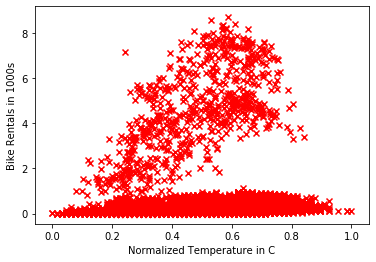

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(temps, rentals, marker='x', color='red')
plt.xlabel('Normalized Temperature in C')
plt.ylabel('Bike Rentals in 1000s')


In [17]:
import numpy as np

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [18]:
theta = np.zeros(2)
X = np.column_stack((np.ones(len(temps)), temps))
y = rentals
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost:', cost)

theta: [0. 0.]
cost: 0.5181257023191608


In [19]:
def gradient_descent(X, y, alpha, iterations):
    theta = np.zeros(2)
    m = len(y)

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])

    return theta

iterations = 5000
alpha = 0.1

theta = gradient_descent(X, y, alpha, iterations)
cost = compute_cost(X, y, theta)

print("theta:", theta)
print('cost:', compute_cost(X, y, theta))

theta: [0.0435901  0.67275391]
cost: 0.44535656788304084


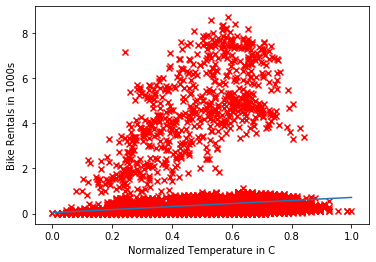

In [20]:
plt.scatter(temps, rentals, marker='x', color='red')
plt.xlabel('Normalized Temperature in C')
plt.ylabel('Bike Rentals in 1000s')
samples = np.linspace(min(temps), max(temps))
plt.plot(samples, theta[0] + theta[1] * samples)

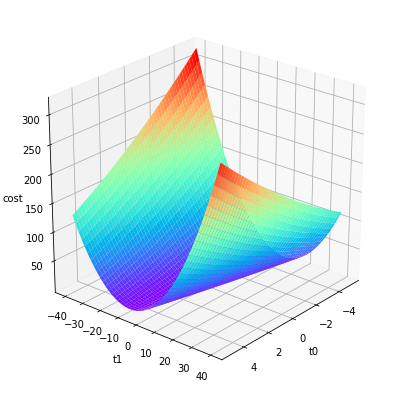

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Xs, Ys = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-40, 40, 50))
Zs = np.array([compute_cost(X, y, [t0, t1]) for t0, t1 in zip(np.ravel(Xs), np.ravel(Ys))])
Zs = np.reshape(Zs, Xs.shape)

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection="3d")
ax.set_xlabel(r't0')
ax.set_ylabel(r't1')
ax.set_zlabel(r'cost')
ax.view_init(elev=25, azim=40)
ax.plot_surface(Xs, Ys, Zs, cmap=cm.rainbow)

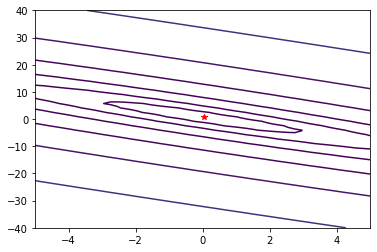

In [22]:
ax = plt.figure().gca()
ax.plot(theta[0], theta[1], 'r*')
plt.contour(Xs, Ys, Zs, np.logspace(-3, 3, 15))

In [23]:
def feature_normalize(X):
    n_features = X.shape[1]
    means = np.array([np.mean(X[:,i]) for i in range(n_features)])
    stddevs = np.array([np.std(X[:,i]) for i in range(n_features)])
    normalized = (X - means) / stddevs

    return normalized

X = data.as_matrix(columns=['atemp', 'hum', 'windspeed'])
X = feature_normalize(X)
X = np.column_stack((np.ones(len(X)), X))

y = data['cnt'].values / 1000

/Users/fazlbarez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [24]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient

    return theta

theta = gradient_descent_multi(X, y, theta, alpha, iterations)
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost', cost)

theta: [ 0.36363103  0.1124047  -0.05801439 -0.00423132]
cost 0.4437401857210666


In [25]:
from numpy.linalg import inv

def normal_eq(X, y):
    return inv(X.T.dot(X)).dot(X.T).dot(y)

theta = normal_eq(X, y)
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost:', cost)

theta: [ 0.36363103  0.1124047  -0.05801439 -0.00423132]
cost: 0.44374018572106655


In [26]:
import tensorflow as tf

X = data.as_matrix(columns=['atemp', 'hum', 'windspeed'])
X = feature_normalize(X)
y = data['cnt'].values / 1000
y = y.reshape((-1, 1))

m = X.shape[0]
n = X.shape[1]

examples = tf.placeholder(tf.float32, [m,n])
labels = tf.placeholder(tf.float32, [m,1])
weights = tf.Variable(tf.zeros([n,1], dtype=np.float32), name='weight')
bias = tf.Variable(tf.zeros([1], dtype=np.float32), name='bias')

/Users/fazlbarez/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/fazlbarez/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/fazlbarez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [27]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    for i in range(1, iterations):
        sess.run(optimizer, feed_dict={
            examples: X,
            labels: y
        })

    print('bias:', sess.run(bias))
    print('weights:', sess.run(weights))

AttributeError: module 'tensorflow' has no attribute 'Session'

In [ ]:
df = pd.read_xlsx('Real estate valuation data set.xlsx')

In [12]:

price = df['Y house price of unit area'].values
house_age = df['X2 house age'].values 


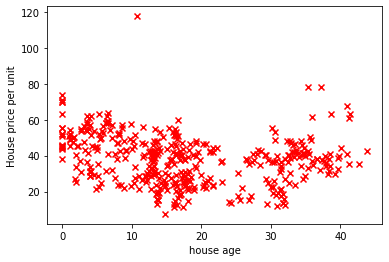

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(house_age, price, marker='x', color='red')
plt.ylabel('House price per unit')
plt.xlabel('house age')
plt.show()

In [20]:
import numpy as np

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [21]:
theta = np.zeros(2)
X = np.column_stack((np.ones(len(house_age)), house_age))
y = price
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost:', cost)


theta: [0. 0.]
cost: 813.5921980676329


In [22]:
def gradient_descent(X, y, alpha, iterations):
    theta = np.zeros(2)
    m = len(y)

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])

    return theta

iterations = 5000
alpha = 0.1

theta = gradient_descent(X, y, alpha, iterations)
cost = compute_cost(X, y, theta)

print("theta:", theta)
print('cost:', compute_cost(X, y, theta))

/Users/fazlbarez/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


theta: [nan nan]
cost: nan


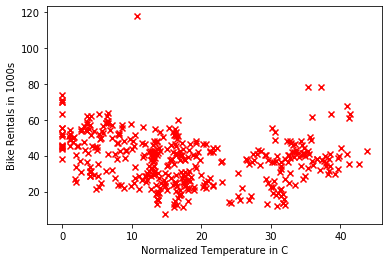

In [25]:
plt.scatter(house_age, price, marker='x', color='red')
plt.xlabel('Normalized Temperature in C')
plt.ylabel('Bike Rentals in 1000s')
samples = np.linspace(min(house_age), max(house_age))
plt.plot(samples, theta[0] + theta[1] * samples)

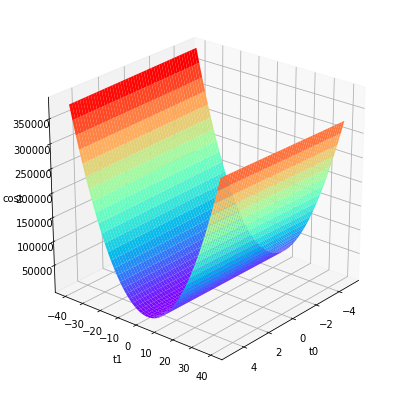

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Xs, Ys = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-40, 40, 50))
Zs = np.array([compute_cost(X, y, [t0, t1]) for t0, t1 in zip(np.ravel(Xs), np.ravel(Ys))])
Zs = np.reshape(Zs, Xs.shape)

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection="3d")
ax.set_xlabel(r't0')
ax.set_ylabel(r't1')
ax.set_zlabel(r'cost')
ax.view_init(elev=25, azim=40)
ax.plot_surface(Xs, Ys, Zs, cmap=cm.rainbow)

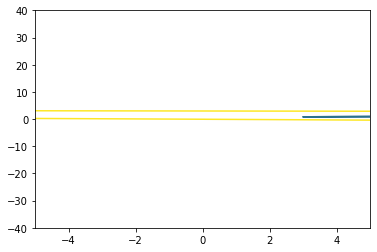

In [27]:
ax = plt.figure().gca()
ax.plot(theta[0], theta[1], 'r*')
plt.contour(Xs, Ys, Zs, np.logspace(-3, 3, 15))

In [29]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [31]:
def feature_normalize(X):
    n_features = X.shape[1]
    means = np.array([np.mean(X[:,i]) for i in range(n_features)])
    stddevs = np.array([np.std(X[:,i]) for i in range(n_features)])
    normalized = (X - means) / stddevs

    return normalized

X = df.as_matrix(columns=['X3 distance to the nearest MRT station', 'X2 house age', 'X4 number of convenience stores'])
X = feature_normalize(X)
X = np.column_stack((np.ones(len(X)), X))

y = df['Y house price of unit area'].values 

/Users/fazlbarez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [32]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient

    return theta

theta = gradient_descent_multi(X, y, theta, alpha, iterations)
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost', cost)


theta: [37.98019324 -6.78084682 -2.87717494  3.81707864]
cost 42.380353211331204


In [33]:
from numpy.linalg import inv

def normal_eq(X, y):
    return inv(X.T.dot(X)).dot(X.T).dot(y)

theta = normal_eq(X, y)
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost:', cost)

theta: [37.98019324 -6.78084682 -2.87717494  3.81707864]
cost: 42.380353211331204


In [42]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#tf.compat.v1.Session()

AttributeError: module 'tensorflow_core.compat.v1.compat' has no attribute 'v1'

In [41]:
import tensorflow as tf

X = df.as_matrix(columns=['X3 distance to the nearest MRT station', 'X2 house age', 'X4 number of convenience stores'])
X = feature_normalize(X)
y = df['Y house price of unit area'].values 
y = y.reshape((-1, 1))

m = X.shape[0]
n = X.shape[1]

examples = tf.placeholder(tf.float32, [m,n])
labels = tf.placeholder(tf.float32, [m,1])
weights = tf.Variable(tf.zeros([n,1], dtype=np.float32), name='weight')
bias = tf.Variable(tf.zeros([1], dtype=np.float32), name='bias')

/Users/fazlbarez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [43]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    for i in range(1, iterations):
        sess.run(optimizer, feed_dict={
            examples: X,
            labels: y
        })

    print('bias:', sess.run(bias))
    print('weights:', sess.run(weights))


NameError: name 'optimizer' is not defined